Exploratory Data Analysis of Superstore Sales - Zach Skiba
----

In this project, I performed an Exploratory Data Analysis (EDA) on a Superstore Sales dataset to gain insights into customer behavior, sales trends, and shipping patterns. The dataset includes transaction details such as order information, shipping modes, customer demographics, and product categories. The goal of this analysis is to evaluate sales performance across different regions, customer segments, and product categories. By cleaning, visualizing, and interpreting the data, I aim to identify key factors that influence sales and customer preferences

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('train.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
#Drop unnecessary columns
df.drop(['Customer ID', 'Row ID', 'Order ID'], axis= 1, inplace=True)

In [7]:
#Check null values
df.isna().sum()

Order Date        0
Ship Date         0
Ship Mode         0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [8]:
df[df['Postal Code'].isna()]

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,05/12/2018,10/12/2018,Standard Class,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,07/11/2016,09/11/2016,Second Class,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,06/04/2017,10/04/2017,Standard Class,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,23/01/2017,27/01/2017,Standard Class,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,23/01/2017,27/01/2017,Standard Class,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,23/01/2017,27/01/2017,Standard Class,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,19/01/2018,23/01/2018,Standard Class,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,19/01/2018,23/01/2018,Standard Class,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,19/01/2018,23/01/2018,Standard Class,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,19/01/2018,23/01/2018,Standard Class,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [9]:
df['Postal Code'] = df['Postal Code'].fillna(5401) #Postal code of Vermont

In [10]:
df.isna().sum()

Order Date       0
Ship Date        0
Ship Mode        0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [11]:
df[df.duplicated(keep= False)]

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
3405,23/04/2015,27/04/2015,Standard Class,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229.0,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372
3406,23/04/2015,27/04/2015,Standard Class,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229.0,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9799 entries, 0 to 9799
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_date     9799 non-null   object 
 1   ship_date      9799 non-null   object 
 2   ship_mode      9799 non-null   object 
 3   customer_name  9799 non-null   object 
 4   segment        9799 non-null   object 
 5   country        9799 non-null   object 
 6   city           9799 non-null   object 
 7   state          9799 non-null   object 
 8   postal_code    9799 non-null   float64
 9   region         9799 non-null   object 
 10  product_id     9799 non-null   object 
 11  category       9799 non-null   object 
 12  sub-category   9799 non-null   object 
 13  product_name   9799 non-null   object 
 14  sales          9799 non-null   float64
dtypes: float64(2), object(13)
memory usage: 1.2+ MB


In [15]:
df['order_date'] = pd.to_datetime(df['order_date'], format= "%d/%m/%Y")
df['ship_date'] = pd.to_datetime(df['ship_date'], format= "%d/%m/%Y")

df['postal_code'] = df['postal_code'].astype(int)

In [16]:
df.head()

,order_date,ship_date,ship_mode,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub-category,product_name,sales
0,2017-11-08,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2017-11-08,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,2017-06-12,2017-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,2016-10-11,2016-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,2016-10-11,2016-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [17]:
df.columns

Index(['order_date', 'ship_date', 'ship_mode', 'customer_name', 'segment',
       'country', 'city', 'state', 'postal_code', 'region', 'product_id',
       'category', 'sub-category', 'product_name', 'sales'],
      dtype='object')

In [18]:
df.nunique()

order_date       1230
ship_date        1326
ship_mode           4
customer_name     793
segment             3
country             1
city              529
state              49
postal_code       627
region              4
product_id       1861
category            3
sub-category       17
product_name     1849
sales            5757
dtype: int64

Exploratory Data Analysis
----

Product Analysis


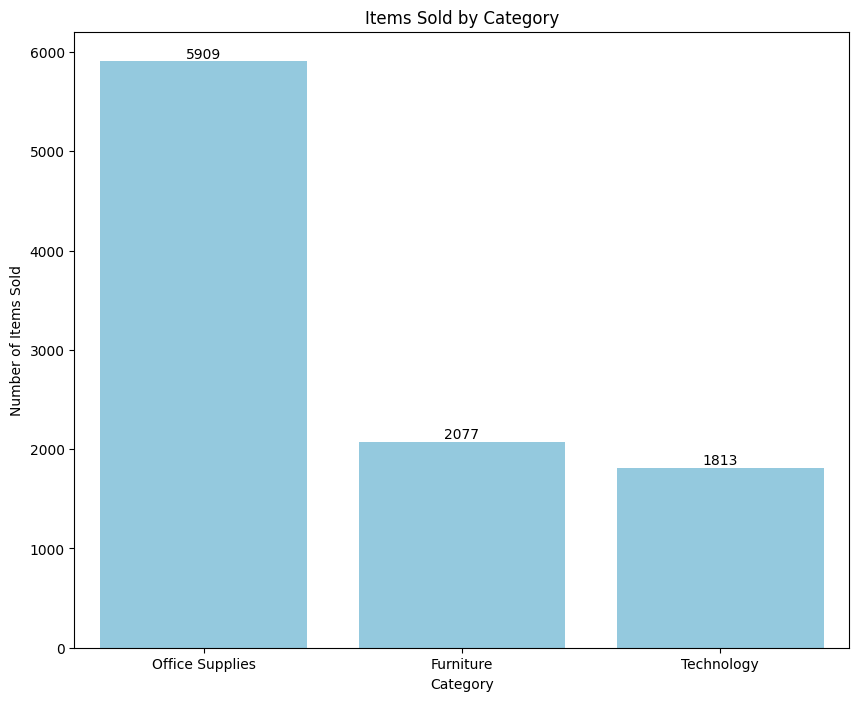

In [19]:
top_categories = df['category'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10,8))

ax = sns.barplot(top_categories, color='skyblue')
plt.title("Items Sold by Category")
plt.xlabel("Category")
plt.ylabel("Number of Items Sold")

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

This bar chart shows the number of items sold in each category.



- Office Supplies had the highest number of items sold, followed by Furniture and Technology.

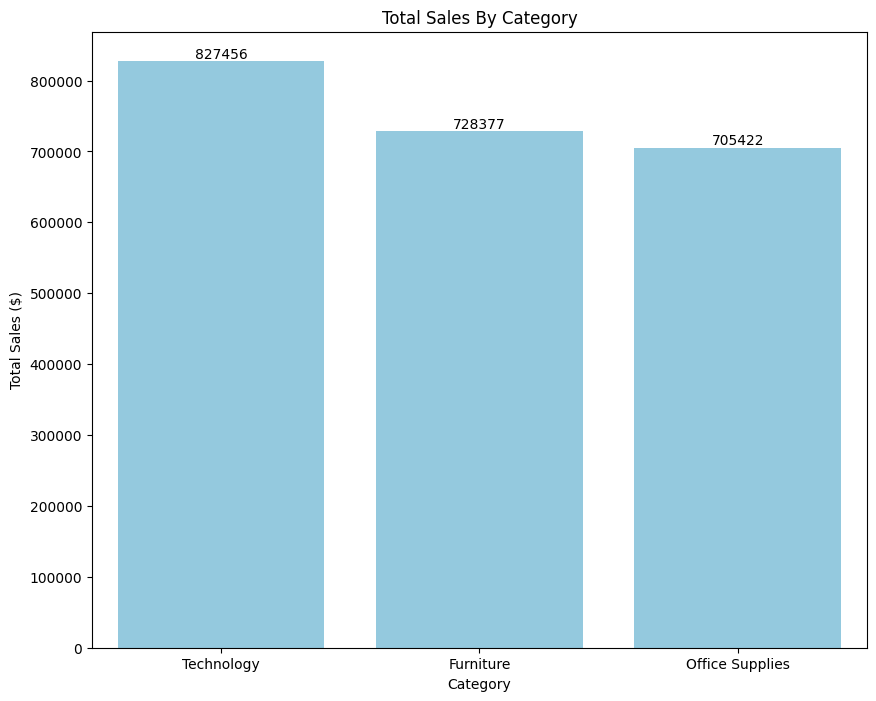

In [20]:
top_categories = df.groupby('category')['sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,8))

ax = sns.barplot(top_categories, color='skyblue')
plt.title("Total Sales By Category")
plt.xlabel("Category")
plt.ylabel("Total Sales ($)")

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()




This graph shows the total sales for each category.


- Despite having the most items sold, Office Supplies generated the least least amount of total sales. Technology had the highest total sales.

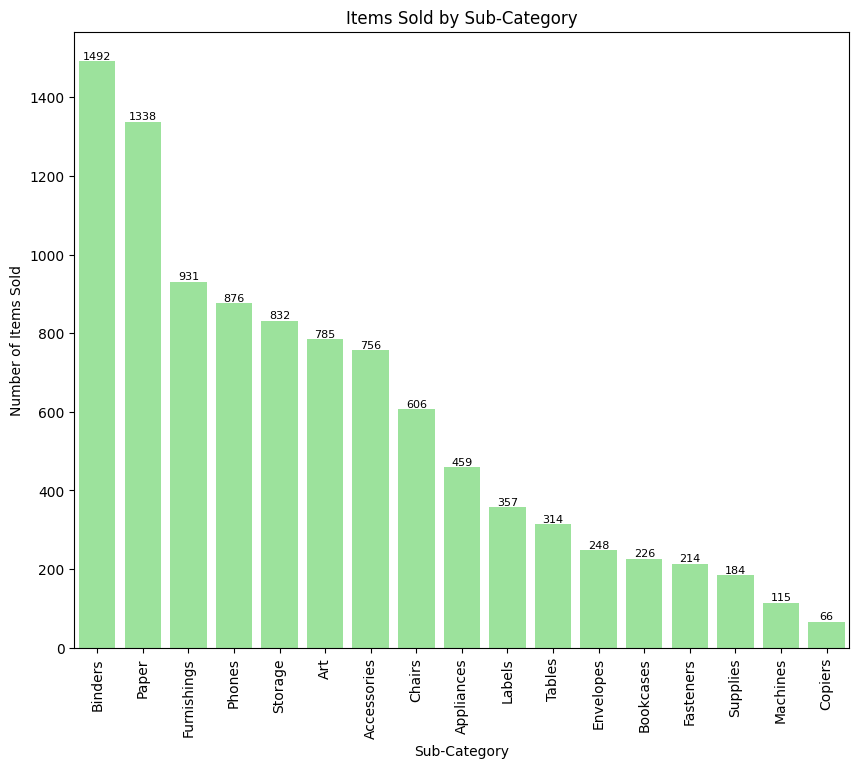

In [21]:
top_subcategories = df['sub-category'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10,8))

ax = sns.barplot(top_subcategories, color='lightgreen')
plt.title("Items Sold by Sub-Category")
plt.xlabel("Sub-Category")
plt.ylabel("Number of Items Sold")
plt.xticks(rotation=90)


for bars in ax.containers:
    ax.bar_label(bars, fontsize = 8)

plt.show()

This chart shows the number of items sold by sub-category.

- Binders and Paper had the highest number of items sold

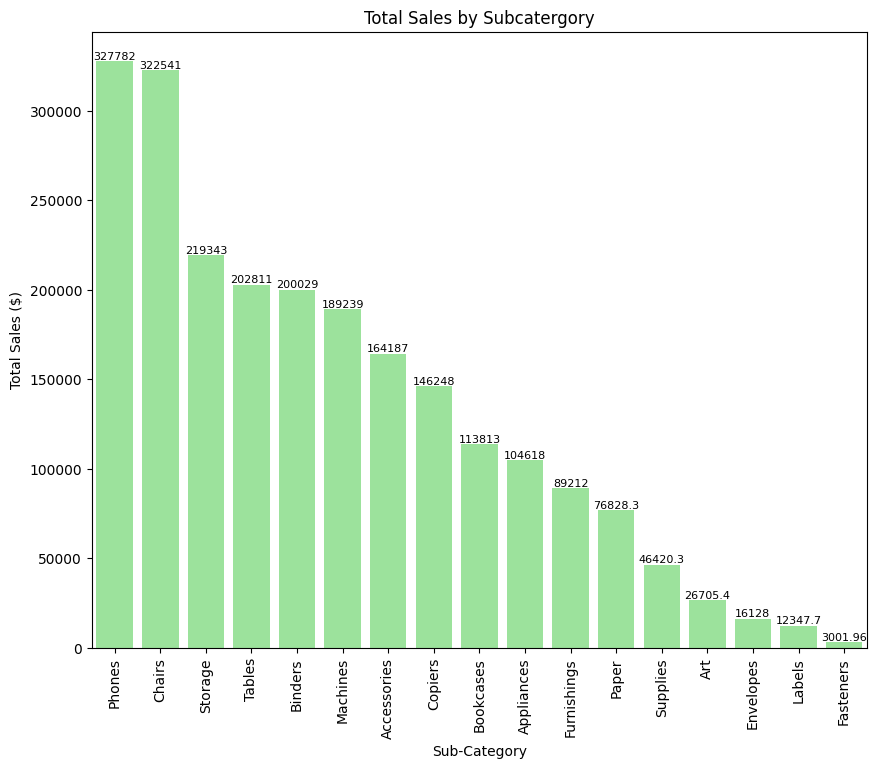

In [22]:
top_subcategories = df.groupby('sub-category')['sales'].sum().sort_values(ascending=False)

plt.figure(figsize= (10,8))
ax = sns.barplot(top_subcategories, color='lightgreen')
plt.title('Total Sales by Subcatergory')
plt.xlabel("Sub-Category")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=90)

for bars in ax.containers:
    ax.bar_label(bars, fontsize = 8)

plt.show()

This graph shows up total sales by sub-category.

- Chairs and Phones had the highest total sales, even though Binders and Paper had the most orders.

Customer Analysis
--

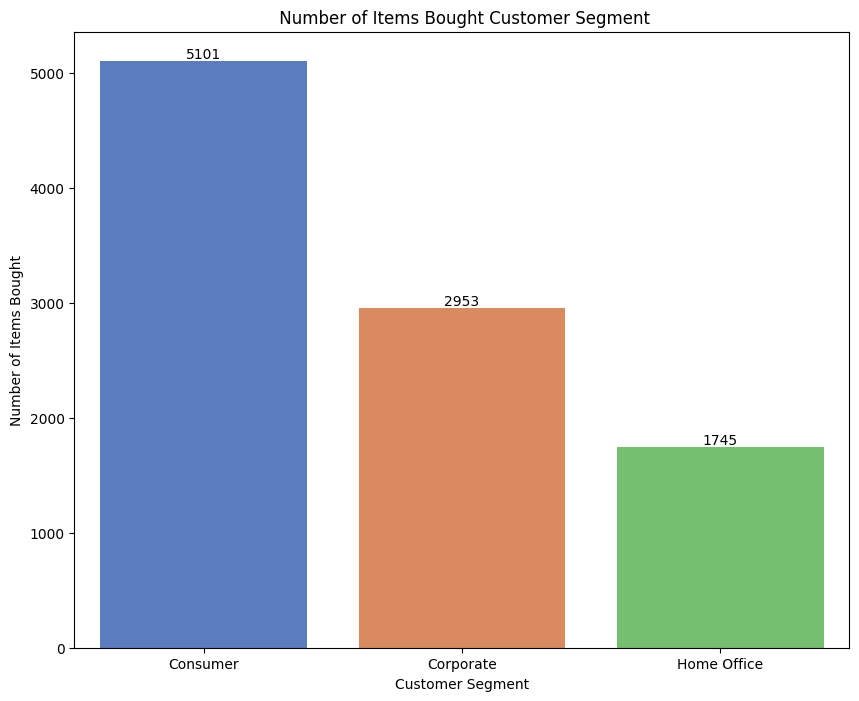

In [23]:
top_customers = df['segment'].value_counts().sort_values(ascending= False)

plt.figure(figsize=(10,8))
ax = sns.barplot(x=top_customers.index, y=top_customers.values, hue=top_customers.index, palette='muted')
plt.title(' Number of Items Bought Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Items Bought')

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()


This bar chart shows which customer segment purchased the most items.

- The Consumer segment had the highest number of items bought, followed by Corporate and Home Office.

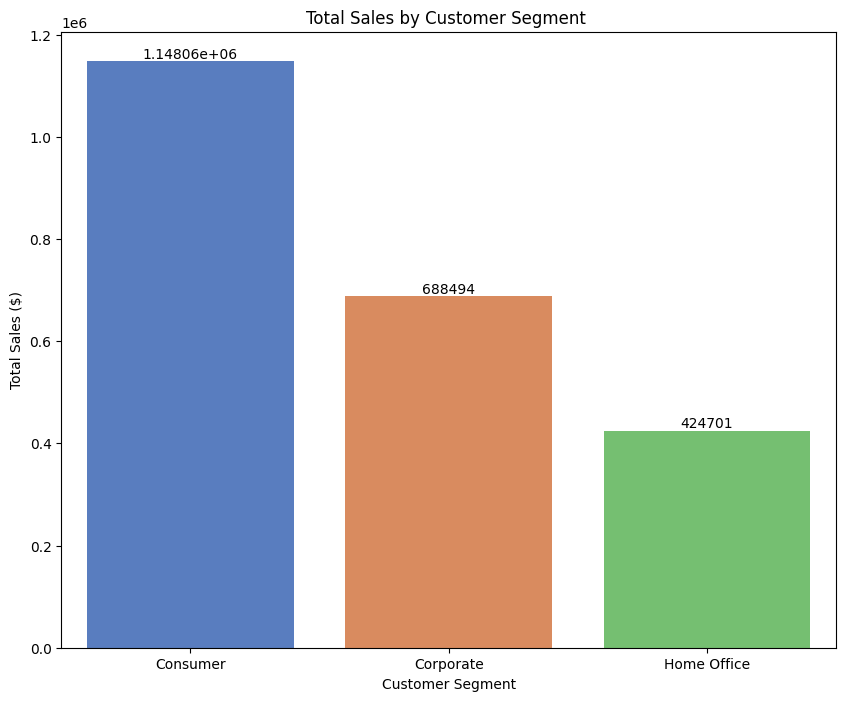

In [24]:
top_customers = df.groupby('segment')['sales'].sum().sort_values(ascending=False)



plt.figure(figsize=(10,8))
ax = sns.barplot(x=top_customers.index, y=top_customers.values, hue=top_customers.index, palette='muted')
plt.title('Total Sales by Customer Segment ')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales ($)')

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

This chart shows the Total Sales per customer segment

- Consumers contributed the most to total sales.

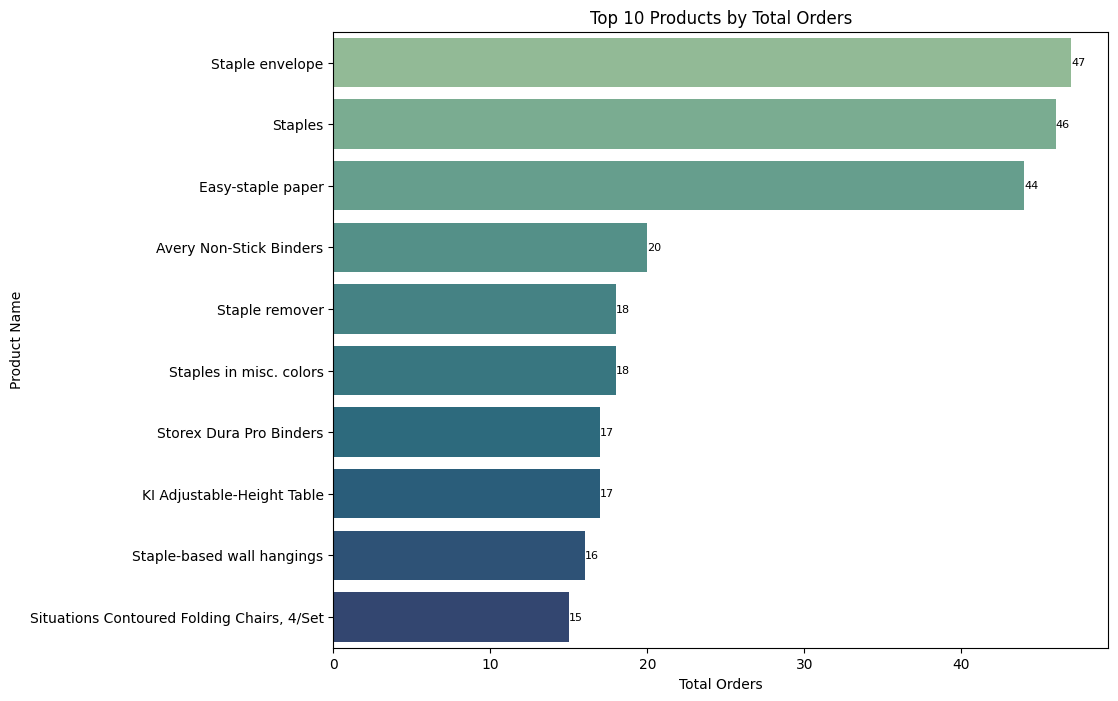

In [25]:
#Product with the highest number of orders
top_sales = df['product_name'].value_counts().sort_values(ascending=False).head(10)


plt.figure(figsize=(10,8))
ax = sns.barplot(x= top_sales.values, y = top_sales.index, hue= top_sales.index, palette='crest')
plt.title('Top 10 Products by Total Orders')
plt.xlabel('Total Orders')
plt.ylabel('Product Name')


for bars in ax.containers:
    ax.bar_label(bars, fmt='{:.0f}', fontsize = 8)

plt.show()

This bar chart displays the most ordered products.

- Staple Envelopes and the Staples were the most frequently ordered products.

In [26]:
import pandas as pd

# Get top 10 most ordered products
top_ordered_products = df['product_name'].value_counts().head(10)

# Aggregate total orders and total sales
top_products = df.groupby('product_name').agg(
    total_orders=('product_name', 'count'), total_sales=('sales', 'sum')).loc[top_ordered_products.index]


top_products['total_sales'] = top_products['total_sales'].apply(lambda x: f"{x:.0f}")



top_products


,total_orders,total_sales
product_name,,
Staple envelope,47,1676
Staples,46,755
Easy-staple paper,44,2414
Avery Non-Stick Binders,20,217
Staples in misc. colors,18,460
Staple remover,18,263
Storex Dura Pro Binders,17,279
KI Adjustable-Height Table,17,4467
Staple-based wall hangings,16,422


As shown in the table, products with high amounts of orders have lower total sales

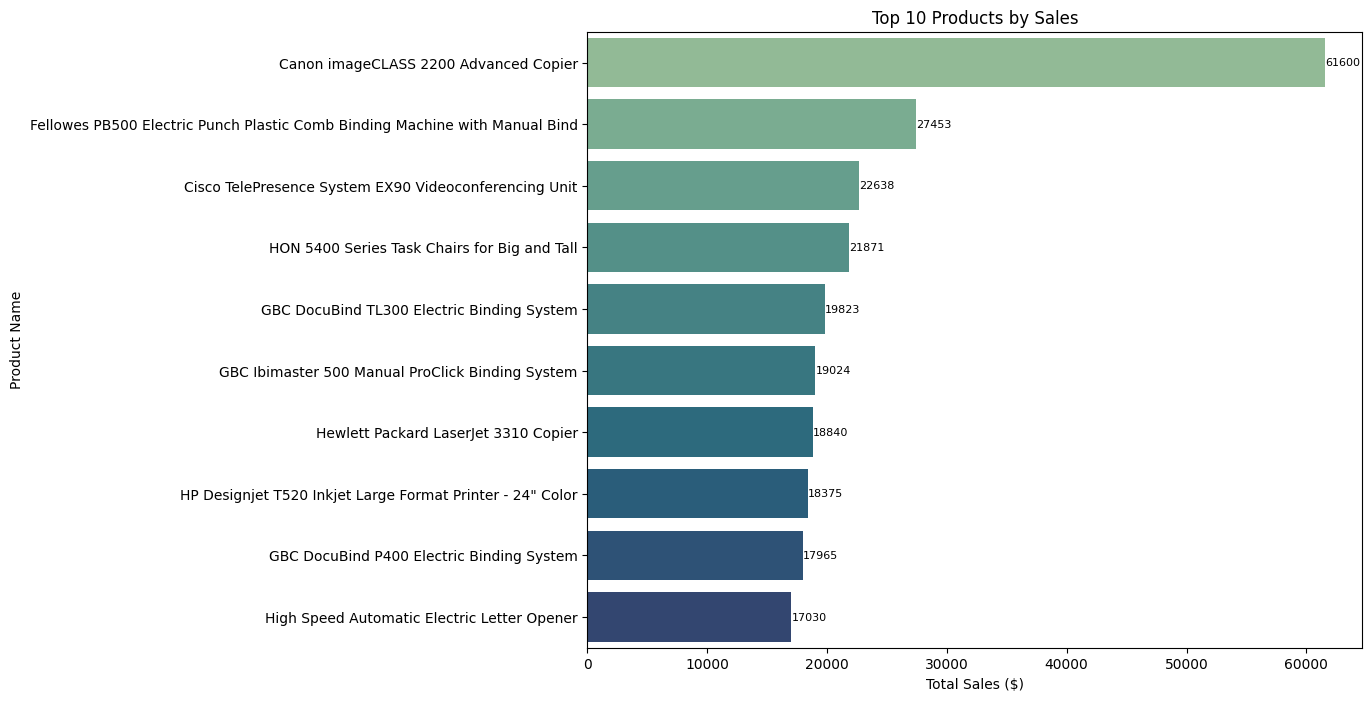

In [27]:
#Product with highest sales
top_sales = df.groupby('product_name')['sales'].sum().sort_values(ascending=False).head(10)


plt.figure(figsize=(10,8))
ax = sns.barplot(x= top_sales.values, y = top_sales.index, hue= top_sales.index, palette='crest')
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales ($)')
plt.ylabel('Product Name')


for bars in ax.containers:
    ax.bar_label(bars, fmt='{:.0f}', fontsize = 8)

plt.show()
    


This graph shows which products generated the highest total sales.

- The Canon imageCLASS 2200 Advanced Copier had the highest total sales

In [28]:
# Top 10 products with most sales
top_sales_products = df.groupby('product_name')['sales'].sum().sort_values(ascending=False).head(10)

# Aggregate total sales and total orders
top_products = df.groupby('product_name').agg(
    total_sales=('sales', 'sum'),  total_orders=('product_name', 'count')).loc[top_sales_products.index]



top_products['total_sales'] = top_products['total_sales'].apply(lambda x: f"{x:.0f}")


top_products

,total_sales,total_orders
product_name,,
Canon imageCLASS 2200 Advanced Copier,61600,5
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453,10
Cisco TelePresence System EX90 Videoconferencing Unit,22638,1
HON 5400 Series Task Chairs for Big and Tall,21871,8
GBC DocuBind TL300 Electric Binding System,19823,11
GBC Ibimaster 500 Manual ProClick Binding System,19024,9
Hewlett Packard LaserJet 3310 Copier,18840,8
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18375,3
GBC DocuBind P400 Electric Binding System,17965,6


As seen in the table above, products with high total sales have a lower number of orders

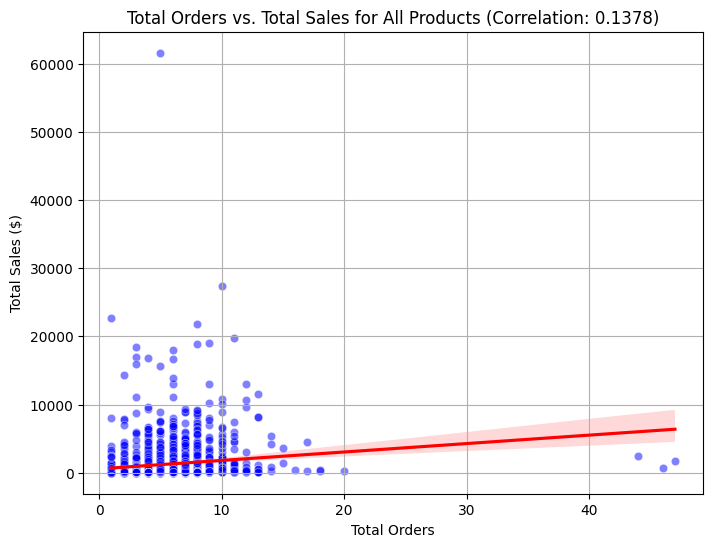

In [29]:
# Aggregate total sales and total orders for all products
all_products = df.groupby('product_name').agg(
    total_orders=('product_name', 'count'), total_sales=('sales', 'sum'))


correlation = all_products.corr().loc['total_orders', 'total_sales']


plt.figure(figsize=(8,6))
sns.scatterplot(x=all_products['total_orders'], y=all_products['total_sales'], color='blue', alpha=0.5)


sns.regplot(x=all_products['total_orders'], y=all_products['total_sales'], scatter=False, color='red')

# Titles and labels
plt.title(f'Total Orders vs. Total Sales for All Products (Correlation: {correlation:.4f})')
plt.xlabel('Total Orders')
plt.ylabel('Total Sales ($)')
plt.grid(True)

plt.show()


This scatter plot shows the relationship between total orders and total sales.

- There is very little correlation between the number of orders and total sales, meaning high sales are not necessarily driven by more frequent orders.

Shipping Analysis
-

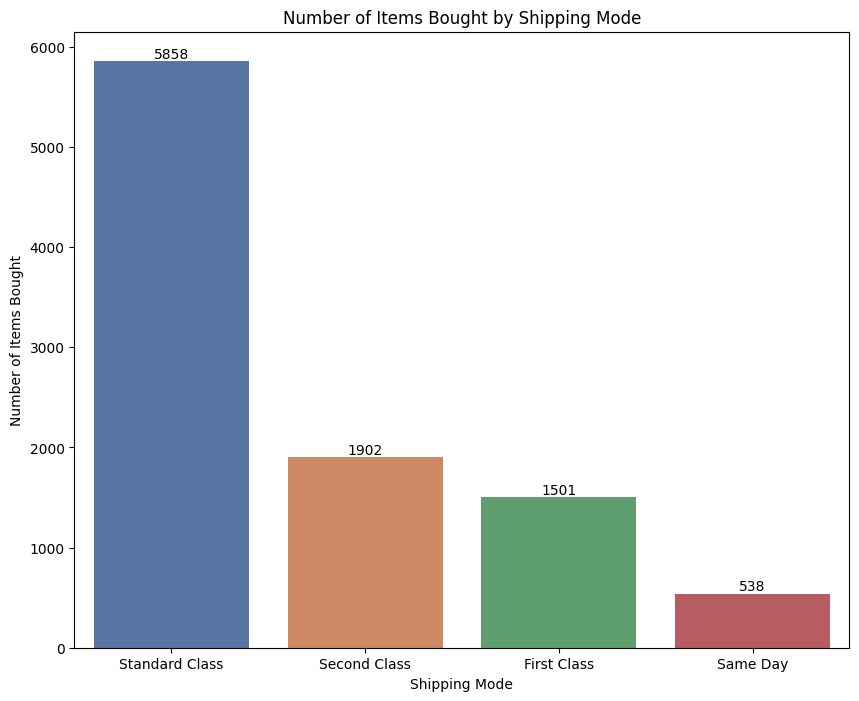

In [30]:
top_shipping_mode = df['ship_mode'].value_counts().sort_values(ascending=False)

plt.figure(figsize= (10,8))
ax = sns.barplot(x= top_shipping_mode.index, y= top_shipping_mode.values, hue=top_shipping_mode.index, palette= 'deep')
plt.title('Number of Items Bought by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Number of Items Bought')

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

This bar chart shows the most common shipping mode.

- Standard Class was the most frequently chosen shipping method.

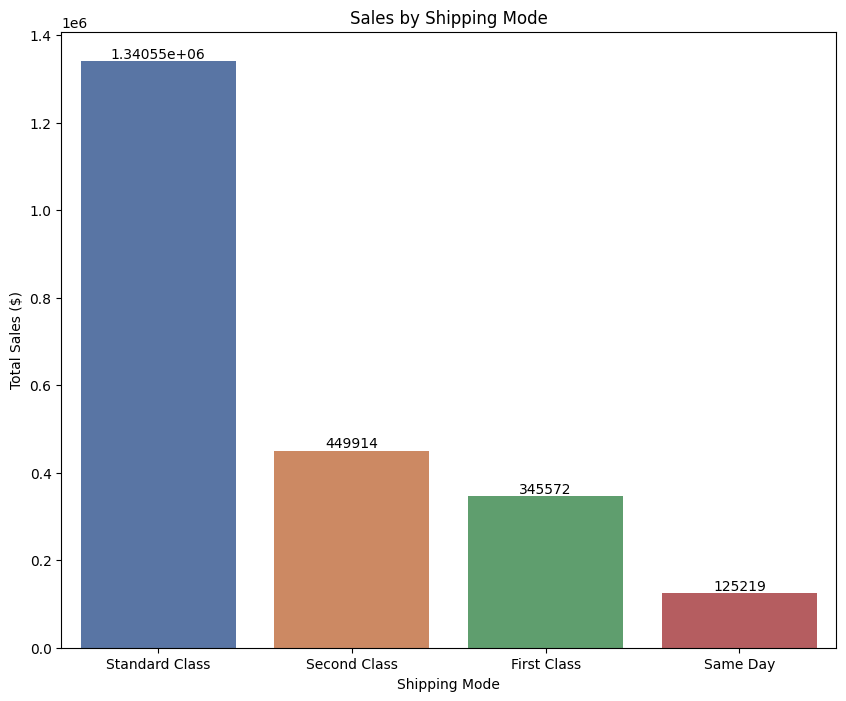

In [31]:
top_shipping_mode = df.groupby('ship_mode')['sales'].sum().sort_values(ascending= False)

plt.figure(figsize= (10,8))
ax = sns.barplot(x= top_shipping_mode.index, y= top_shipping_mode.values, hue=top_shipping_mode.index, palette= 'deep')
plt.title('Sales by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Total Sales ($)')

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

This chart displays total sales by shipping mode.

- The Standard Class also made the most amount of sales.

In [32]:
df.columns

Index(['order_date', 'ship_date', 'ship_mode', 'customer_name', 'segment',
       'country', 'city', 'state', 'postal_code', 'region', 'product_id',
       'category', 'sub-category', 'product_name', 'sales'],
      dtype='object')

Regional Analysis
-

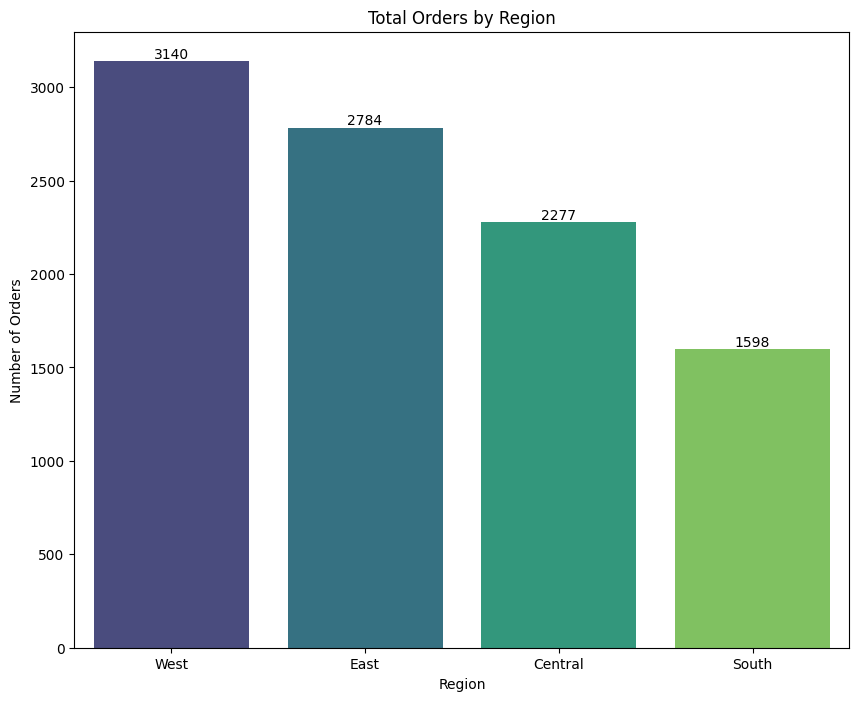

In [33]:
#Regional analysis - Orders
top_region = df['region'].value_counts().sort_values(ascending=False)

plt.figure(figsize= (10,8))
ax = sns.barplot(x= top_region.index, y= top_region.values, hue=top_region.index, palette= 'viridis')
plt.title('Total Orders by Region')
plt.xlabel('Region')
plt.ylabel('Number of Orders')

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

This graph shows the number of orders per region.

- The West had the highest number of orders.

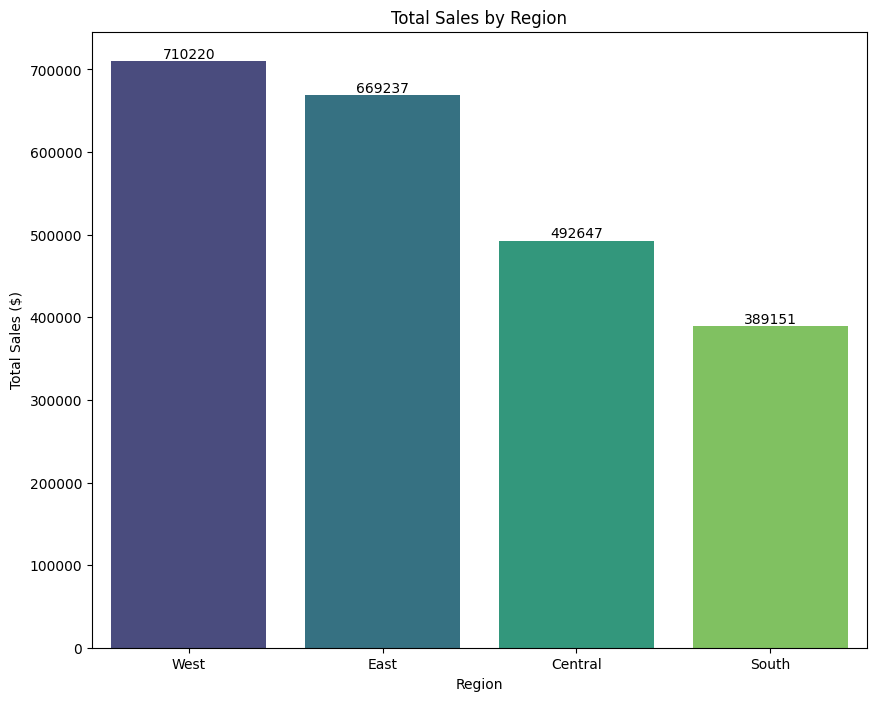

In [34]:
#Regional Analysis - Sales
top_region = df.groupby('region')['sales'].sum().sort_values(ascending=False)

plt.figure(figsize= (10,8))
ax = sns.barplot(x= top_region.index, y= top_region.values, hue=top_region.index, palette= 'viridis')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales ($)')

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

This graph shows total sales per region.
- The West also made the most amount of sales.

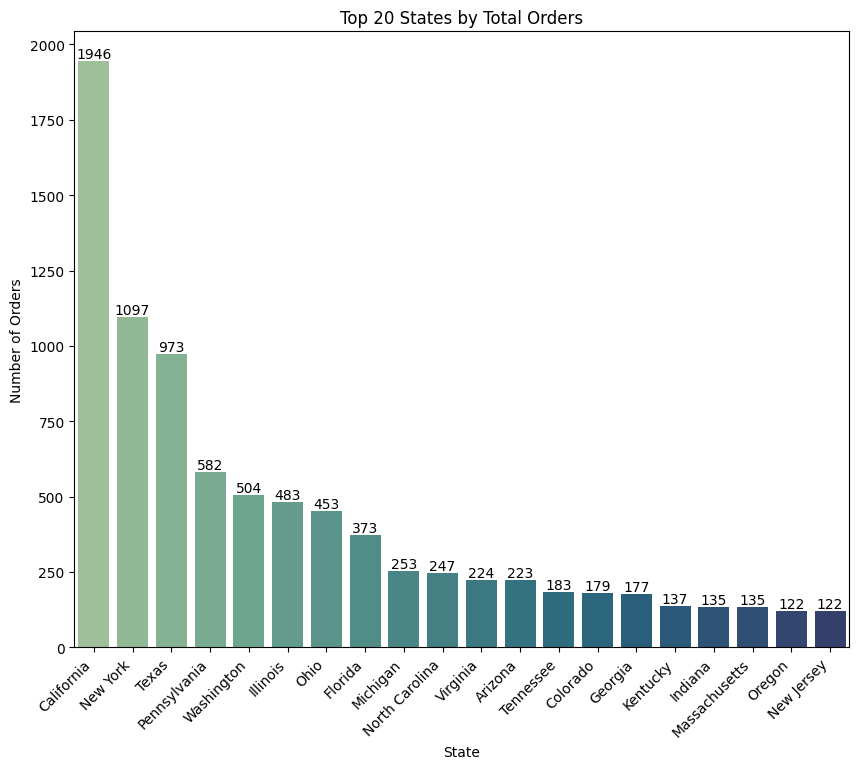

In [35]:
#State - Orders
top_state= df['state'].value_counts().sort_values(ascending=False).head(20)

plt.figure(figsize= (10,8))
ax = sns.barplot(x= top_state.index, y= top_state.values, hue=top_state.index, palette= 'crest')
plt.title('Top 20 States by Total Orders')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

This graph shows the states with the most orders.

- California, New York, and Texas had the highest number of orders.

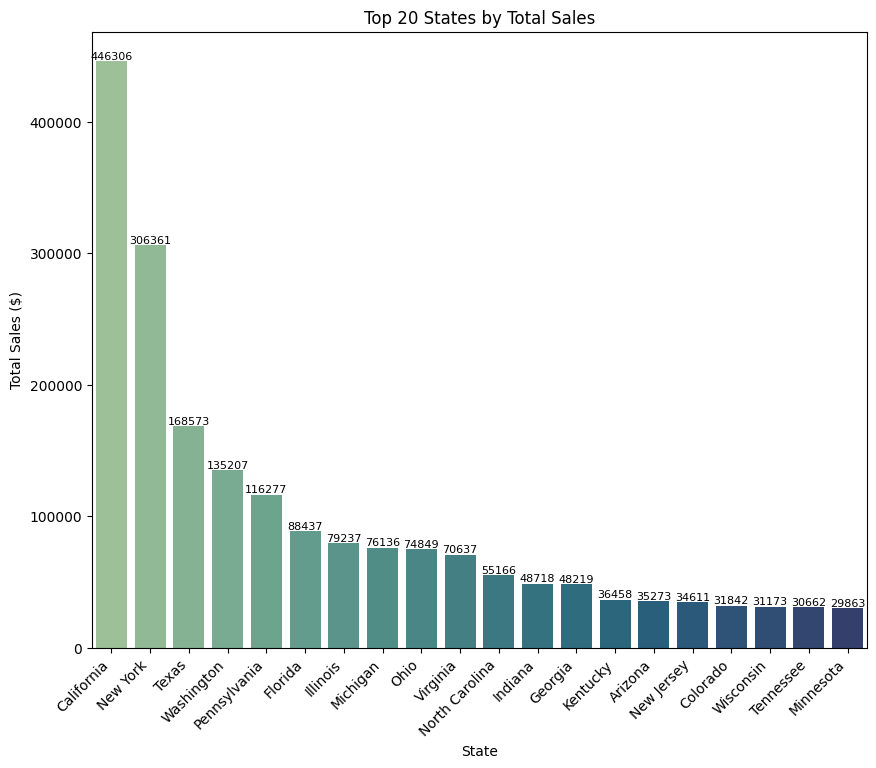

In [36]:
#State - Sales
top_state= df.groupby('state')['sales'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize= (10,8))
ax = sns.barplot(x= top_state.index, y= top_state.values, hue=top_state.index, palette= 'crest')
plt.title('Top 20 States by Total Sales')
plt.xlabel('State')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45, ha='right')

for bars in ax.containers:
    ax.bar_label(bars, fontsize = 8, fmt = '{:.0f}')

plt.show()

This graph ranks states by total sales.

- California, New York, and Texas also had the highest total sales.

In [37]:
df.columns

Index(['order_date', 'ship_date', 'ship_mode', 'customer_name', 'segment',
       'country', 'city', 'state', 'postal_code', 'region', 'product_id',
       'category', 'sub-category', 'product_name', 'sales'],
      dtype='object')

Time Series Analysis
-

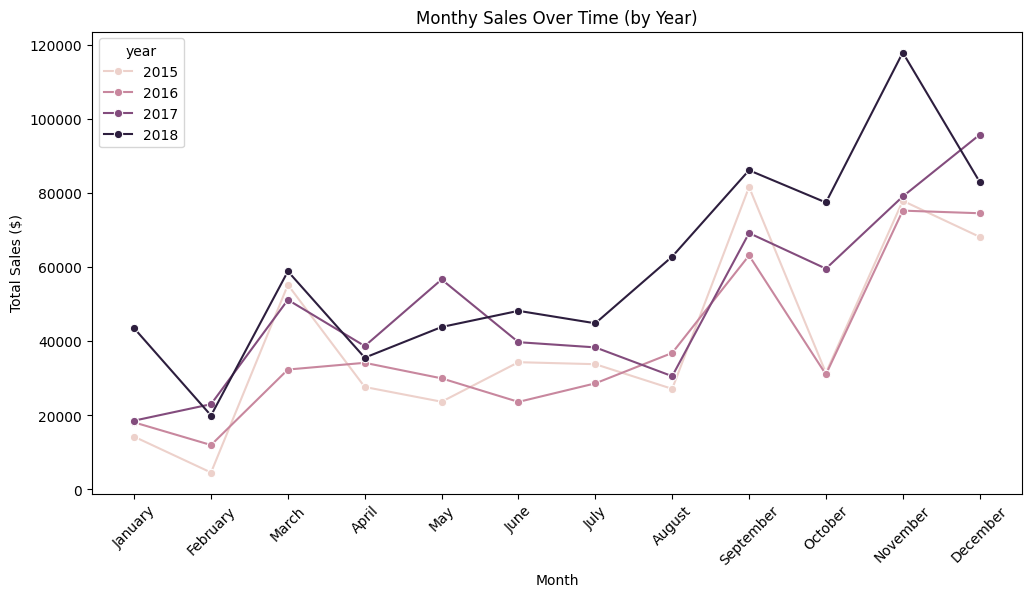

In [38]:
#Sales over time
df['year'] = df['order_date'].dt.year
df['month'] = pd.Categorical(df['order_date'].dt.month_name(),
                             categories=['January', 'February', 'March', 'April', 'May', 'June',
                                         'July', 'August', 'September', 'October', 'November', 'December'],
                             ordered=True)

monthly_sales = df.groupby(['year', 'month'], observed=True)['sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='month', y='sales', hue='year', marker='o')
plt.title('Monthy Sales Over Time (by Year)')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.show()



This line chart shows sales trends over different months and years.

- Total Sales have increased over the years, but not consistently each month.

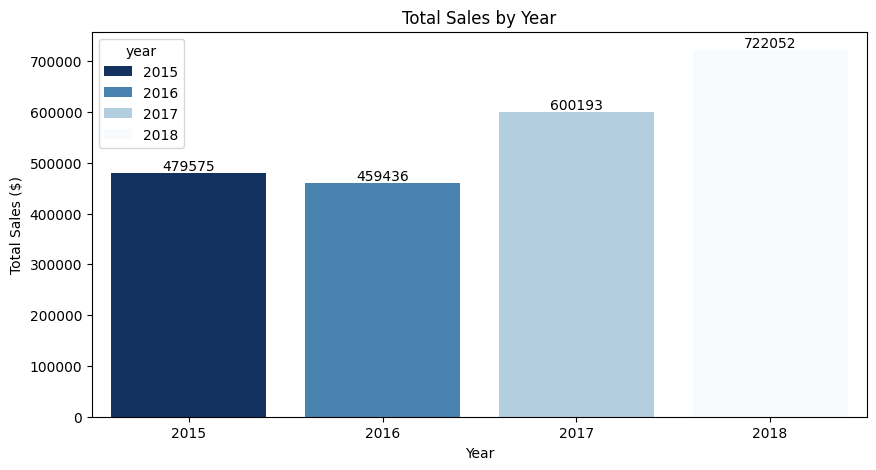

In [39]:
# Calculate total sales per year
yearly_sales = df.groupby('year')['sales'].sum().reset_index()


plt.figure(figsize=(10, 5))
ax = sns.barplot(x=yearly_sales['year'], y=yearly_sales['sales'], hue=yearly_sales['year'], palette='Blues_r')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales ($)')


for bars in ax.containers:
    ax.bar_label(bars)

plt.show()



This bar chart shows the yearly sales trend.

- 2018 had the highest sales.

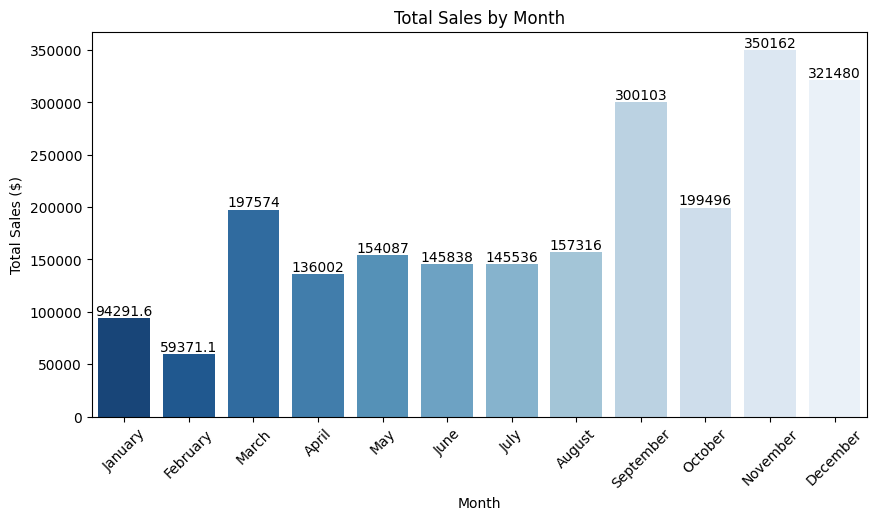

In [40]:
month_sales = df.groupby('month', observed= False)['sales'].sum().reindex(['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December'])

plt.figure(figsize=(10, 5))
ax =sns.barplot(x=month_sales.index, y=month_sales.values, hue=month_sales.index ,palette='Blues_r')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()


This bar chart shows the distribution of sales across different months.

- November had the highest sales, likely due to holiday shopping.

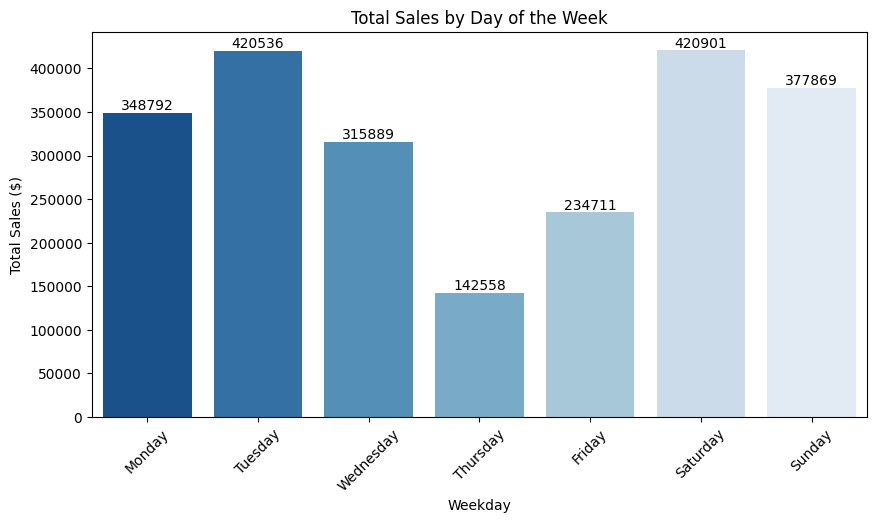

In [41]:
df['weekday'] = df['order_date'].dt.day_name()

weekday_sales = df.groupby('weekday')['sales'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.figure(figsize=(10, 5))
ax =sns.barplot(x=weekday_sales.index, y=weekday_sales.values, hue=weekday_sales.index ,palette='Blues_r')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Weekday')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()


This bar chart shows which day of the week had the most sales.

- Saturday had the highest sales.

In [42]:
df.head()

,order_date,ship_date,ship_mode,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub-category,product_name,sales,year,month,weekday
0,2017-11-08,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,November,Wednesday
1,2017-11-08,2017-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,November,Wednesday
2,2017-06-12,2017-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,June,Monday
3,2016-10-11,2016-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,October,Tuesday
4,2016-10-11,2016-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,October,Tuesday


Customer Behavior
----

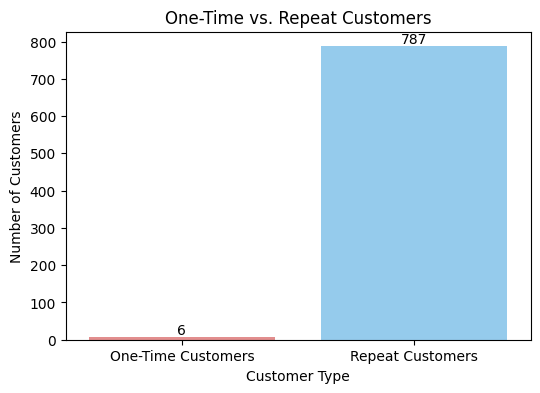

In [43]:

# Count one-time and repeat customers
customer_orders = df['customer_name'].value_counts()
repeat_customers = customer_orders[customer_orders > 1].count()
one_time_customers = customer_orders[customer_orders == 1].count()

categories = ['One-Time Customers', 'Repeat Customers']
counts = [one_time_customers, repeat_customers]


plt.figure(figsize=(6, 4))
ax =sns.barplot(x=categories, y=counts, hue= counts, palette=['lightcoral', 'lightskyblue'])


plt.xlabel('Customer Type')
plt.ylabel('Number of Customers')
plt.title('One-Time vs. Repeat Customers')


for bars in ax.containers:
    ax.bar_label(bars)

ax.legend_.remove()

# Show plot
plt.show()


This bar chart shows the difference between one-time and repeat customers.

- Almost all the customers were repeat customers, with only 6 being one-time buyers.

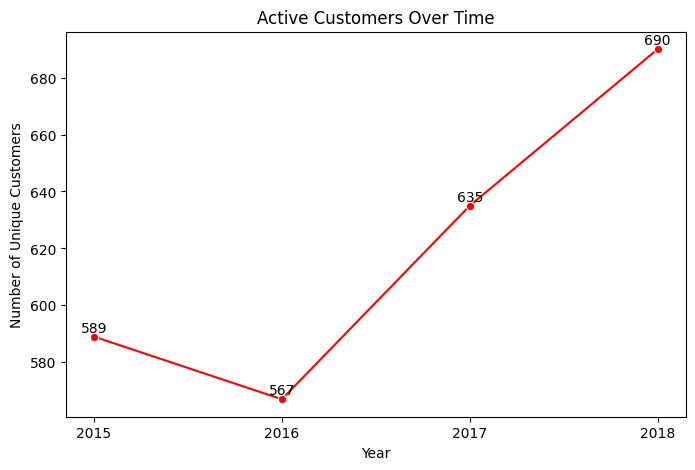

In [44]:
cust_per_year = df.groupby('year')['customer_name'].nunique()


plt.figure(figsize=(8, 5))
ax = sns.lineplot(x=cust_per_year.index, y=cust_per_year.values, marker='o', color='r')

plt.xlabel('Year')
plt.ylabel('Number of Unique Customers')
plt.title('Active Customers Over Time')
plt.xticks(cust_per_year.index) 

for x, y in zip(cust_per_year.index, cust_per_year.values):
    ax.text(x, y+.5, f'{y}', ha='center', va='bottom', fontsize=10)

plt.show()

This line chart tracks the number of unique customers each year.

- The number of active customers increased over time.

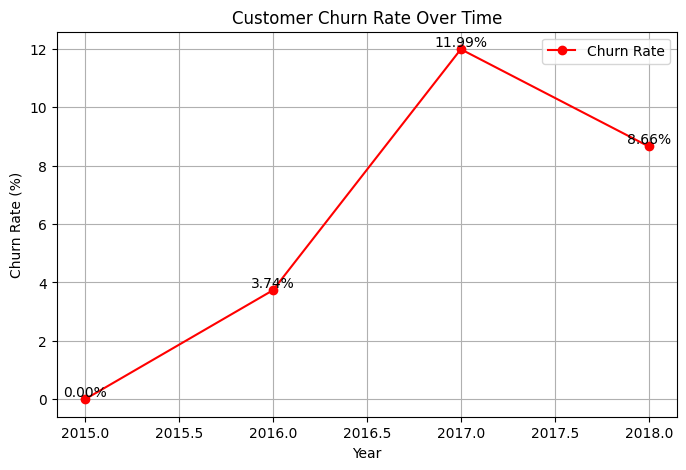

In [45]:


churn_rate = cust_per_year.pct_change().abs() * 100  
churn_rate = churn_rate.fillna(0)  


plt.figure(figsize=(8, 5))
plt.plot(churn_rate.index, churn_rate, marker='o', linestyle='-', color='red', label='Churn Rate')


plt.xlabel('Year')
plt.ylabel('Churn Rate (%)')
plt.title('Customer Churn Rate Over Time')
plt.legend()
plt.grid(True)

for x, y in zip(churn_rate.index, churn_rate.values):
    plt.text(x, y, f'{y:.2f}%', ha='center', va='bottom', fontsize=10)

plt.show()

This line chart shows the percentage of customers who stopped purchasing each year.

- Although churn rate increased each year, the total number of new customers also increased

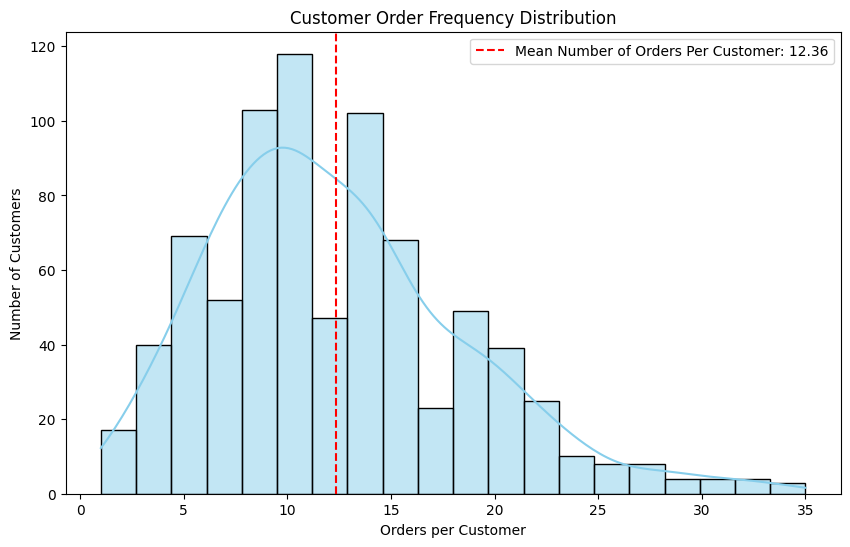

In [46]:
order_counts = df['customer_name'].value_counts()

mean_order = order_counts.mean()

plt.figure(figsize=(10, 6))

sns.histplot(order_counts, bins=20, kde=True, color='skyblue')
plt.xlabel('Orders per Customer')
plt.ylabel('Number of Customers')
plt.title('Customer Order Frequency Distribution')

plt.axvline(mean_order, color='red', linestyle='dashed', label=f'Mean Number of Orders Per Customer: {mean_order:.2f}') #why label doesn't work
plt.legend()

plt.show()

This histogram shows how frequently customers place orders.

- The average number of orders per customer was 12.36.

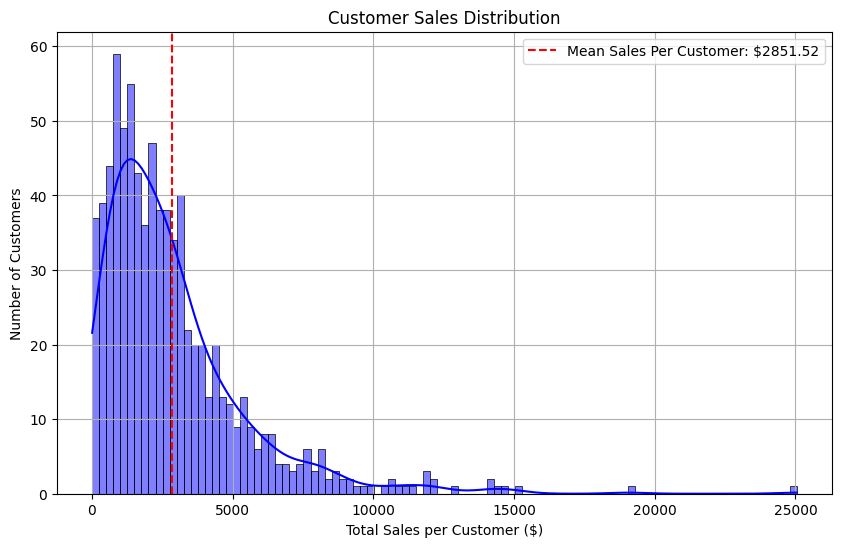

In [47]:
clv = df.groupby('customer_name')['sales'].sum()

mean_clv = clv.mean()

plt.figure(figsize=(10, 6))
sns.histplot(clv, bins=100, kde=True, color='blue')

plt.xlabel('Total Sales per Customer ($)')
plt.ylabel('Number of Customers')
plt.title('Customer Sales Distribution')
plt.grid(True)

plt.axvline(mean_clv, color='red', linestyle='dashed', label=f'Mean Sales Per Customer: ${mean_clv:.2f}') #figure out why label doesn't work

plt.legend()
plt.show()

This histogram shows how much sales each individual customer generates.

- The average sales per customer is $2851.52.

----------------------------------------------------------------

Through this analysis, we found many valuable insights in sales trends, customer behavior, product performance, and regional sales patterns. Here are the key takeaways:

1. Product Performance:
    - Technology generated the highest revenue, while Office Supplies had the highest quantity sold but lower total sales.
    - Binders and Paper were the most frequently purchased sub-categories, but Chairs and Phones generated the highest sales.
    - There is a weak correlation between total orders and total sales, meaning higher sales are not necessarily driven by frequent purchases.
2. Customer Behavior: 
    - Consumers were the largest customer segment, contributing the most to total sales.
    - Most customers were repeat buyers, indicating strong customer retention.
3. Regional and Shipping Insights: 
    - The West had the highest number of orders and total sales, with California, New York, and Texas being the top-performing states.
    - Standard Class was the most frequently chosen shipping method and also generated the highest total sales
4. Time Based Trends: 
    - Sales have increased over the years, with 2018 being the year with the highest total sales.   
    - November had the highest sales, likely due to holiday shopping, and Saturday was the best sales day of the week.

Buisness Implications and Recommendations:
- Promotions: 
    - Focus on high sales  products like Chairs and Phones while offering discounts on high order but low sales items like Binders and Paper.
- Customer Retention:
    - Since most of the customers are already repeat customers, the buisness can use loyalty programs to keep the number of repeat customers high.
- Improve Shipping Efficiency:
    - Optimize costs for Standard Class shipping, because of its popularity.
    - The buisness could also encourage premium shipping options by having incentives for same day delivery. 
- Regional Targeting: 
    - Expand marketing, inventory, and promotions in the West region, particularly in California, New York, and Texas, to maximize sales. 
    
